<a href="https://colab.research.google.com/github/ironcev5/Python-projects/blob/master/Learner_Notebook_Full_Code_IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/FoodHub Project/foodhub_order.csv'
df1 = pd.read_csv(file_path)

In [ ]:
df2 = df1.copy()

I decided to work with two files because of Question 13. I need one file in which the unrated values are replaced with the median, and another later on, with unreplaced values, to answer q13.

In [ ]:
df1 = pd.read_csv(file_path)
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
rows, columns = df1.shape
print(df1.shape)
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


(1898, 9)
Number of rows: 1898
Number of columns: 9


#### Observations:The function df.shape gives the number of rows as the first item in the parentheses, and the number of columns as the second item. There are 1898 rows and 9 columns in the dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The df.info() function gives the range of entries in rows and the number of columns, as well as the types of data. According to the information on dtypes, there is one column with floats, four with integers and four with strings or text data. The printed table shows the columns ordered from 0 to 8. Columns order_id, customer_id, food_preparation_time and delivery_time consist of integers. Columns restaurant_name, cuisine_type, day_of_the_week and rating consist of object data (strings), and column cost_of_the_order consists of floats.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
missing_values = df1.isnull().sum()
print(missing_values)

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [ ]:
not_rated_count = (df1['rating'] == 'Not given').sum()
print(f"\nNumber of 'Not given' entries: {not_rated_count}")


Number of 'Not given' entries: 736


#### Observations: Based on the observation of the occurence of 0, there are no missing values in the data. However, there are missing ratings with string data 'Not given'. These should also be taken into account as missing values in the data. Therefore, not_rated_count was calculated with the function (df['rating']== 'Not given').sum*(). There are 736 missing values in the rating column, which means that 736 orders were not given a rating by customers. In the next segment I will treat the missing ratings so that Python recognizes them as missing values.



In [ ]:
# Treat missing values
# Replace 'not rated' with NaN
df1['rating'] = df1['rating'].replace('Not given', np.nan)


In [ ]:
# Check again for missing values after replacement
missing_values_after = df1.isnull().sum()
print("\nMissing values after replacing 'Not given':")
print(missing_values_after)


Missing values after replacing 'Not given':
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


I treated the missing values by using the np.nan function. After that, I checked again the output of data.isnull function. The expected output was 736 missing values in the rating column, and that is what I indeed got.The next thing to do is to convert all the missing values in the rating column to floats and apply the median value of the rating column to them.

In [ ]:
# Convert to float
df1['rating'] = df1['rating'].astype(float)

In [ ]:
#Check the dataset for data typeprint(df1['rating'])
print(df1['rating'])

0       NaN
1       NaN
2       5.0
3       3.0
4       4.0
       ... 
1893    5.0
1894    5.0
1895    NaN
1896    5.0
1897    NaN
Name: rating, Length: 1898, dtype: float64


In [ ]:
# Fill missing values with the median
df1['rating'] = df1['rating'].fillna(df1['rating'].median())

Then I applied the median to the missing values by using the data.fillna function.

In [ ]:
# After applying fillna()
df1['rating'] = df1['rating'].fillna(df1['rating'].median())
print("Missing values after fillna():", df1['rating'].isnull().sum())

Missing values after fillna(): 0


In [ ]:
print(df1['rating'])

0       5.0
1       5.0
2       5.0
3       3.0
4       4.0
       ... 
1893    5.0
1894    5.0
1895    5.0
1896    5.0
1897    5.0
Name: rating, Length: 1898, dtype: float64


I checked to see whether there were any missing values after applying the median. There are no missing values anymore.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#Check the statistical summary of the data
statistical_summary = df1.describe()
print(statistical_summary)

           order_id    customer_id  cost_of_the_order       rating  \
count  1.898000e+03    1898.000000        1898.000000  1898.000000   
mean   1.477496e+06  171168.478398          16.498851     4.598525   
std    5.480497e+02  113698.139743           7.483812     0.662289   
min    1.476547e+06    1311.000000           4.470000     3.000000   
25%    1.477021e+06   77787.750000          12.080000     4.000000   
50%    1.477496e+06  128600.000000          14.140000     5.000000   
75%    1.477970e+06  270525.000000          22.297500     5.000000   
max    1.478444e+06  405334.000000          35.410000     5.000000   

       food_preparation_time  delivery_time  
count            1898.000000    1898.000000  
mean               27.371970      24.161749  
std                 4.632481       4.972637  
min                20.000000      15.000000  
25%                23.000000      20.000000  
50%                27.000000      25.000000  
75%                31.000000      28.000000  
m

In [ ]:
#Check the minimum, average, and maximum time of food preparation
prep_time_summary = df1['food_preparation_time'].describe()

min_prep_time = prep_time_summary['min']
avg_prep_time = prep_time_summary['mean']
max_prep_time = prep_time_summary['max']

print(f"Minimum food preparation time: {min_prep_time} minutes")
print(f"Average food preparation time: {avg_prep_time:.2f} minutes")
print(f"Maximum food preparation time: {max_prep_time} minutes")

Minimum food preparation time: 20.0 minutes
Average food preparation time: 27.37 minutes
Maximum food preparation time: 35.0 minutes


#### Observations: I applied the df.describe function to see the summary for each column. The minimal, average, and maximal preparation times are visible upon visual inspection of the data by checking the food_preparation_time column for 'min', 'max' and 'mean' values, but they can also be extracted by appying .describe function to each of them separately. In summary, it takes between 20 (min) and 35 (max) minutes to prepare a food order, with an average (mean) of 27.37 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#Find unrated orders in the original dataset
not_rated_count = (df2['rating'] == 'Not given').sum()
print(f"\nNumber of 'Not given' entries: {not_rated_count}")


Number of 'Not given' entries: 736


#### Observations: This was answered earlier in the data description (Question 3). There were initially 736 unrated orders with values 'Not given' in the rating column. Those were replaced in df1 with np.nan function and later filled (data.fillna) with the mean value for the rating column. As a result, there are no unrated orders in df1, but there are 736 unrated orders in df2, which represents the original dataset.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
## Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Order ID

In [ ]:
#Find the overall number of orders in the dataset
df1['order_id'].nunique()

1898

There are 1898 orders in the dataset.

Customer ID

In [ ]:
#Find the overall number of unique customer ids in the dataset
df1['customer_id'].nunique()

1200

There are 1200 unique customers in the dataset.

Restaurant Name

In [ ]:
#Find the overall number of unique restaurant names in the dataset
df1['restaurant_name'].nunique()

178

There are 178 restaurants in the dataset.

Cuisine Type

In [ ]:
#Find the number of unique cuisine types in the dataset
df1['cuisine_type'].nunique()

14

There are 14 cuisine types in the dataset.

<ipython-input-354-375e06c23f5a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, palette='pastel')


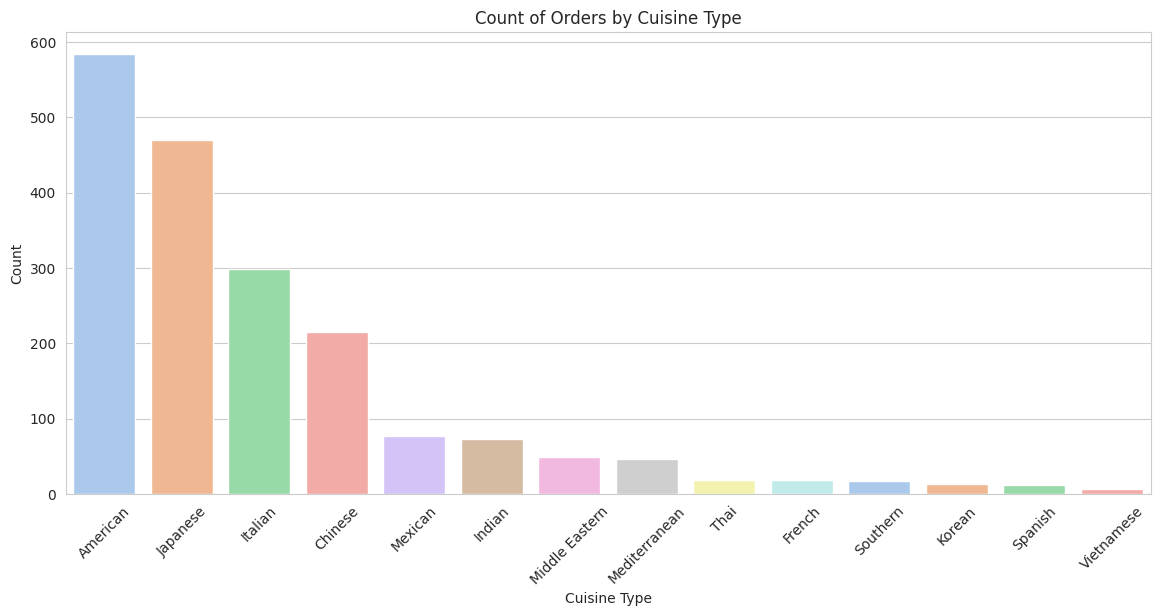

In [ ]:
# Set the figure size for the plot by taking into account 14 cuisine types on the x axis
plt.figure(figsize=(14, 6))
# Make the visualization appealing by applying a whitegrid
sns.set_style("whitegrid")

# Create a count plot for the 'cuisine_type' column
# Order the bars by the frequency of each cuisine type
# Make the visualization appealing by applying a special palette
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, palette='pastel')

# Add a title to the plot
plt.title('Count of Orders by Cuisine Type')

#Label the x and y axis
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()

There are 14 cuisine types in the dataset, so I chose the figsize of 14 for x label and 6 for y label in the histogram. We can see that the highest number of orders is for American cuisine, followed by Japanese (most likely select meals, like sushi) and the lowest number of orders for Vietnamese.

Cost of the Order

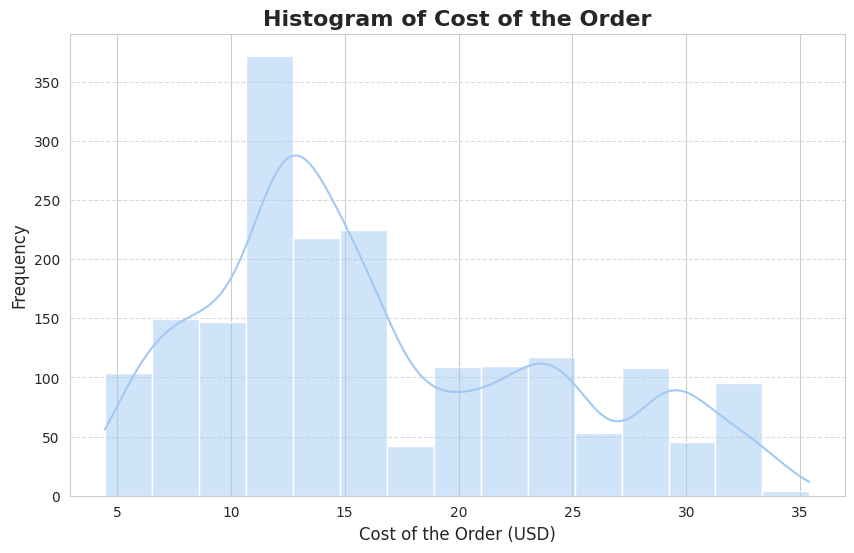

In [ ]:
# Create a histogram for the 'cost_of_the_order' column
# Set a larger figure size for clarity
plt.figure(figsize=(10, 6))
# Set the pastel palette for the visualization
sns.set_palette("pastel")

sns.histplot(data=df, x='cost_of_the_order', bins=15, kde=True)  # Add KDE for smooth curve
plt.title('Histogram of Cost of the Order', fontsize=16, fontweight='bold')  # Add a title
plt.xlabel('Cost of the Order (USD)', fontsize=12)  # Label for x-axis
plt.ylabel('Frequency', fontsize=12)  # Label for y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

plt.show()


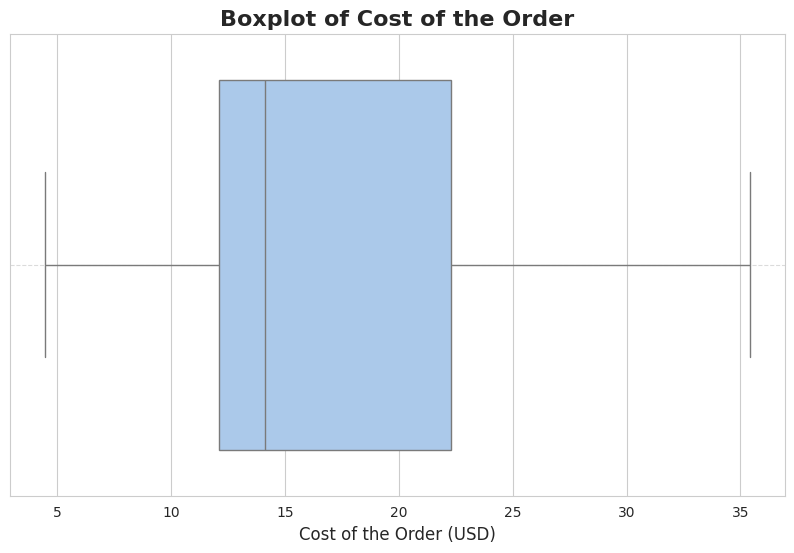

In [ ]:
# Set the style and palette for the visualization
sns.set_style("whitegrid")  # Use white grid for better readability
sns.set_palette("pastel")  # Use the pastel palette

# Set the figure size for the plot
plt.figure(figsize=(10, 6))  # Ensure the plot is large enough for clarity

# Create a boxplot for the 'cost_of_the_order' column
sns.boxplot(data=df, x='cost_of_the_order')

# Add a title and axis labels
plt.title('Boxplot of Cost of the Order', fontsize=16, fontweight='bold')  # Add a bold title
plt.xlabel('Cost of the Order (USD)', fontsize=12)  # Label for x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better context

# Display the plot
plt.show()

The histogram shows right-skewed distribution with a large number of orders between 12 and 22 USD, and the majority of orders cost ca. 12 USD. The peak of 350 orders in the price range of 12 USD indicates that this is the most common cost range (according to the histogram, just above 10 USD and under 14 USD). Orders below 5 USD and above 34 USD and more are very rare. The boxplot shows that most orders are clustered between 12 and 22, while the median is 14.14. The median is closer to Q1, which confirms that it is right-skewed. The cost of orders is relatively wide in range, but not high in variability. The range is from 4.47 to 35.41, but most orders are in the middle range of costs. Median is closer to Q1 than to Q3. This means that some orders cost much more than most orders, but this does not happen frequently.


Day of the Week

In [ ]:
# Show the unique values in the 'day_of_the_week' column
df1['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
# Create and print a summary of the 'day_of_the_week' column
day_of_the_week_summary = df1['day_of_the_week'].describe()
print(day_of_the_week_summary)

count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object


I checked the number of orders according to days of the week by using the .describe function before visualising the data. It is obvious that weekend orders present the majority of orders with 1351 out of a total of 1898 orders done on weekends.

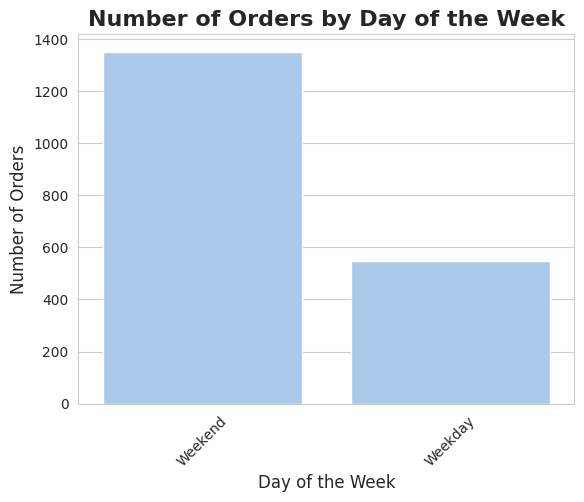

In [ ]:
# Create a count plot for the 'day_of_the_week' column
# This shows the number of orders for each day, ordered by count from highest to lowest
sns.countplot(data=df1, x='day_of_the_week', order=df1['day_of_the_week'].value_counts().index)

# Add a title and axis labels
plt.title('Number of Orders by Day of the Week', fontsize=16, fontweight='bold')  # Add a bold title
plt.xlabel('Day of the Week', fontsize=12)  # Label for x-axis
plt.ylabel('Number of Orders', fontsize=12)  # Label for y-axis

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Display the plot
plt.show()

The countplot shows that there are close to 1400 orders on weekends vs. a little under 600 orders on weekdays. Weekends are the most popular time for restaurant orders, with more than double the number of orders in comparison to weekdays.

Rating

In [ ]:
# Display unique values in the 'rating' column in df1
df1['rating'].unique()

array([5., 3., 4.])

In [ ]:
restaurant_ratings_stats = df1.groupby('restaurant_name')['rating']

Ratings in the df1 dataset (with NaN values replaced by the median) have the float values of 3, 4, and 5.

In [ ]:
cuisine_ratings = df1.groupby('cuisine_type')['rating']
cuisine_ratings_summary = cuisine_ratings.agg(['mean', 'median', 'std', 'count']).reset_index()
cuisine_ratings_summary = cuisine_ratings_summary.sort_values(by='mean', ascending=False)
print(cuisine_ratings_summary)

      cuisine_type      mean  median       std  count
11         Spanish  4.916667     5.0  0.288675     12
12            Thai  4.842105     5.0  0.374634     19
3           Indian  4.684932     5.0  0.598069     73
8          Mexican  4.636364     5.0  0.626374     77
5         Japanese  4.636170     5.0  0.634450    470
4          Italian  4.630872     5.0  0.649776    298
2           French  4.611111     5.0  0.697802     18
1          Chinese  4.590698     5.0  0.683522    215
0         American  4.558219     5.0  0.683072    584
10        Southern  4.470588     5.0  0.624264     17
9   Middle Eastern  4.469388     5.0  0.680136     49
7    Mediterranean  4.456522     5.0  0.808470     46
6           Korean  4.384615     5.0  0.767948     13
13      Vietnamese  4.285714     5.0  0.951190      7


The highest ratings according to mean are for Spanish (4.91) and Thai cuisine (4.84). However, those cuisines have a low number of observations. Cuisines with the number of observations above 100 are American, Japanese, Italian, and Chinese. Among those, the highest rated are Japanese and Italian (4.6), followed by Chinese (4.59) and American (4.55). The lowest ratings are given to Korean and Vietnamese cuisines, but they do not have a high enough count of occurences for a statistically reliable result.

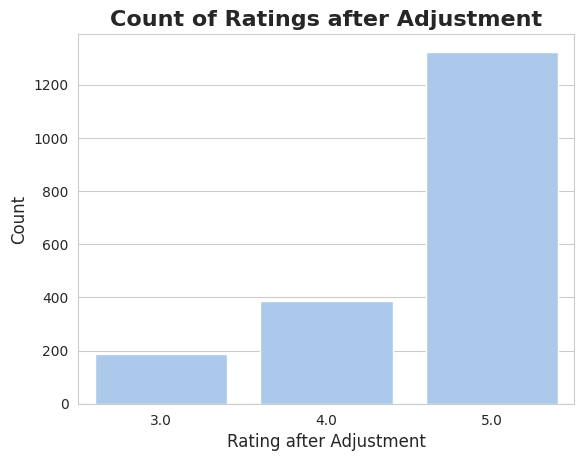

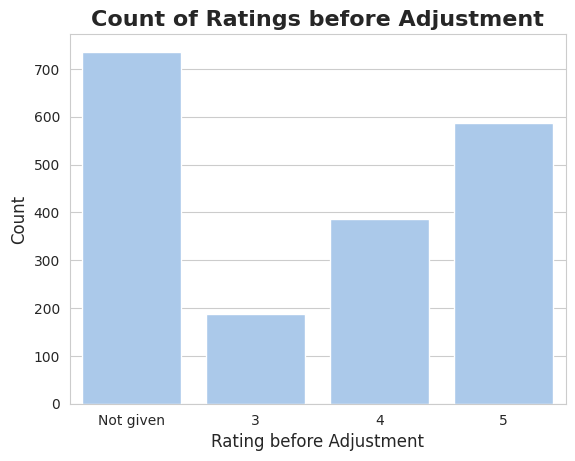

In [ ]:
# Create a count plot for the 'rating' column
# Give a visualization of the adjusted dataset (NaN replaced by mean value)
sns.countplot(data=df1, x='rating')
plt.title('Count of Ratings after Adjustment', fontsize=16, fontweight='bold')  # Add a title to the plot
plt.xlabel('Rating after Adjustment', fontsize=12)  # Label the x-axis
plt.ylabel('Count', fontsize=12)  # Label the y-axis
#Show the count plot
plt.show()

# Give a visualization of the original dataset

# Define the desired order for the x-axis
rating_order = ['Not given', 3, 4, 5]
sns.countplot(data=df2, x='rating', order=rating_order)
plt.title('Count of Ratings before Adjustment', fontsize=16, fontweight='bold')  # Add a title to the plot
plt.xlabel('Rating before Adjustment', fontsize=12)  # Label the x-axis
plt.ylabel('Count', fontsize=12)  # Label the y-axis
#Show the count plot
plt.show()

When checking the ratings in the adjusted dataset (df1) and the original dataset (df2), we see that in reality the most frequent occurence is that of unrated orders, with the second most frequent rating being 5. There is in the non-adjusted dataset smaller proportion of rating value 5 than in the adjusted dataset. This is because 5 is the mean value of the rating column, and it was used to replace NaN values in the adjusted dataset. It will be useful to compare the ratings given with the cost of order and type of cuisine. This will be done in Multivariate Analysis.

Food Preparation Time

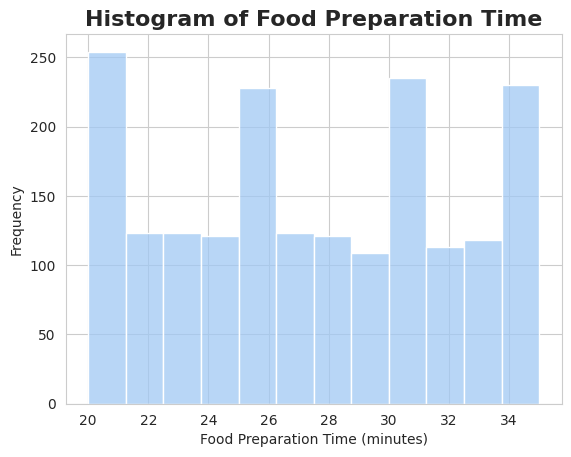

In [ ]:
# Histogram for food preparation time
# Make it visually appealing

sns.histplot(data=df1, x='food_preparation_time')
plt.title('Histogram of Food Preparation Time', fontsize=16, fontweight='bold')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()




The histogram shows that most often the food is prepared in 20 minutes, followed by 31, 34 and 25 minutes.

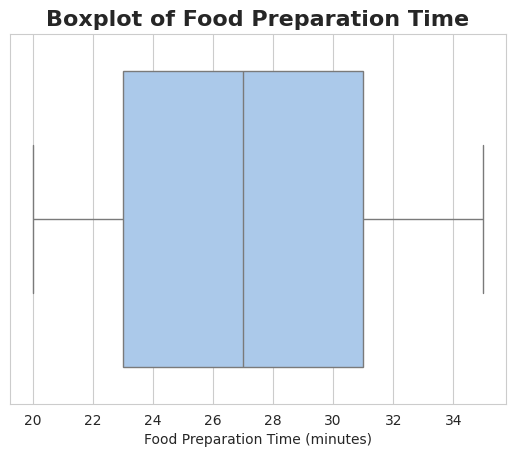

In [ ]:
# Boxplot for food preparation time, visually appealing
sns.boxplot(data=df1, x='food_preparation_time')
plt.title('Boxplot of Food Preparation Time', fontsize=16, fontweight='bold')
plt.xlabel('Food Preparation Time (minutes)')
plt.show()



Most orders are prepared between 23 and 31 minutes and the values in the boxplot are clustered around the middle and the median value.

Delivery Time

Text(0, 0.5, 'Frequency')

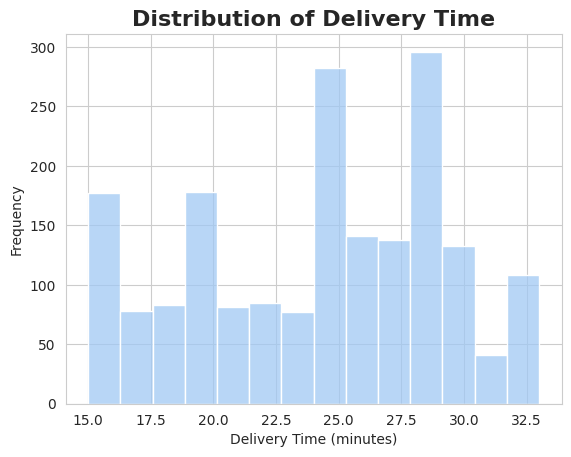

In [ ]:
# Histogram for delivery time, visually appealing
sns.histplot(data['delivery_time'])
plt.title('Distribution of Delivery Time', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')



Text(0.5, 1.0, 'Boxplot of Delivery Time')

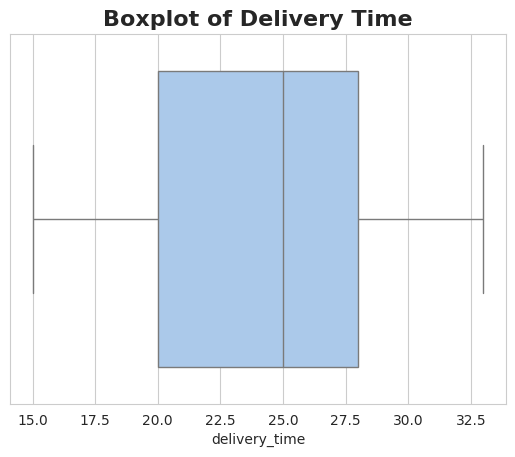

In [ ]:
# Boxplot for delivery time, visually appealing
sns.boxplot(x=data['delivery_time'])
plt.title('Boxplot of Delivery Time', fontsize=16, fontweight='bold')


The median value of delivery time is around 25 minutes, with most delivery times clustered between 20 and 28 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Count the number of orders for each restaurant
top_restaurants = df1['restaurant_name'].value_counts().head(5)

# Display the top 5 restaurants
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations: Shake Shack is the restaurant with the largest number of orders (219) in the dataset, alomost double in comparison to the second restaurant, The Meatball Shop (132). Blue Ribbon Sushi has a slightly smaller number of orders (119) than The Meatball Shop. In fourth place is Blue Ribbon Fried Chicken (96), and in fifth is Parm (68), which is far removed from the first four restaurants in the number of orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter the data for weekend
weekend_data = df1[df1['day_of_the_week'].isin(['Weekend'])]

# Count the occurrences of each cuisine type on weekends
popular_cuisine_weekend = weekend_data['cuisine_type'].value_counts().head(1)

# Display the most popular cuisine on weekends
print("Most Popular Cuisine on Weekends:")
print(popular_cuisine_weekend)

Most Popular Cuisine on Weekends:
cuisine_type
American    415
Name: count, dtype: int64


#### Observations: American cuisine is the most popular cuisine in the dataset and it is not surprising that it is also the most popular cuisine on weekends. As already seen from the dataset, most orders happen on weekends. Also, among the top 5 restaurants according to the number of orders, 3 represent American cuisine (Shake Shack, The Meatball Shop, Blue Ribbon Fried Chicken).Therefore, it was expected to get American cuisine as the result in this question.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Count total number of orders
total_orders = df1.shape[0]

# Count number of orders that cost more than $20
df1_greater_than_20 = df1[df1['cost_of_the_order'] > 20].shape[0]

# Calculate the percentage
percentage_above_20 = (df1_greater_than_20 / total_orders) * 100

# Display the result
print(f"Percentage of orders that cost more than $20: {percentage_above_20:.2f}%")

Percentage of orders that cost more than $20: 29.24%


#### Observations: According to previous calculations, most orders cost between 12 and 20 USD. An almost 30% of orders priced above 20 USD shows that there is a significant number of customers who are willing to spend more money than average. These customers might prefer premium items on the menu or combined dishes, or extras. Also, they might order from less frequently represented restaurants, which have higher costs. On the other hand, orders above 20 USD might indicate group orders for a larger number of people, especially considering weekend gathering and parties. To understand this better, we should segment orders by price range and see their frequency. We would also want to look into the orders according to specific restaurants. It can also be helpful to check whether higher priced orders are linked to longer preparation times or specific cuisines. These insights will then let us make recommendations such as to develop the offer of premium items and market premium options (if we find out that there is a significant number of customers for them). Also, we can check for customer segmentation and recommend the development of offers for different types of customers.


Number of Orders by Spending Category

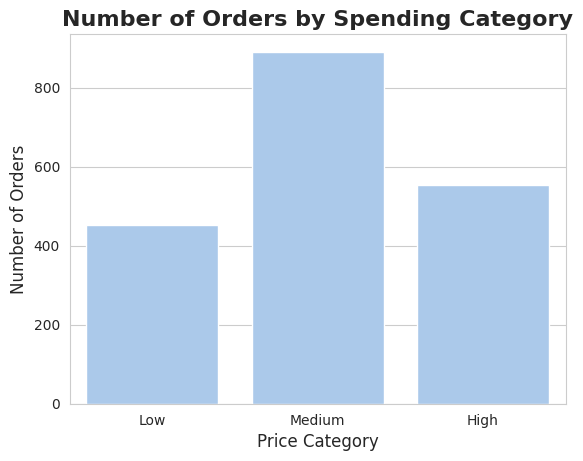

In [ ]:
# Make categories of orders based on cost
# The 'pd.cut()' function bins the 'cost_of_the_order' into three categories:
# - 'Low': Orders with a cost between 0 and 12
# - 'Medium': Orders with a cost between 12 and 20
# - 'High': Orders with a cost between 20 and 35
df1['price_category'] = pd.cut(df['cost_of_the_order'],
                               bins=[0, 12, 20, 35],  # Define the boundaries of the bins
                               labels=['Low', 'Medium', 'High'])  # Define the labels for each bin

# Create a count plot to visualize the number of orders in each price category
sns.countplot(x='price_category', data=df1)  # Count plot for 'price_category'

# Add a descriptive title for the plot
plt.title("Number of Orders by Spending Category", fontsize=16, fontweight='bold')

# Label the x-axis to indicate it represents the price categories
plt.xlabel("Price Category", fontsize=12)

# Label the y-axis to indicate it represents the number of orders
plt.ylabel("Number of Orders", fontsize=12)

# Display the plot
plt.show()

While the largest number of orders is in the medium price category, the second largest number of orders is in the high price category. This means that there is a significant number of customers who are willing to spend more than average on their food orders and who order premium food items.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Calculate the mean delivery time
mean_delivery_time = df1['delivery_time'].mean()

# Display the result
print(f"Mean order delivery time: {mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


In [ ]:
# Calculate the average delivery time for weekdays and weekends
# The 'groupby()' function groups the data by the 'day_of_the_week' column
# The 'mean()' function calculates the average delivery time for each group
avg_delivery_time_by_day = df1.groupby('day_of_the_week')['delivery_time'].mean()
print(avg_delivery_time_by_day)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations: I've already analyzed the mean delivery time in question 6, but I've repeated some interesting calculations, specifically the comparison between the delivery times on weekdays and weekends. Delivery times are shorter on weekends, which indicates that possibly there are more delivery persons available or delivery persons take a larger number of orders to complete in one trip on weekends. It would also be interesting to check whether the more expensive orders take longer time to be delivered or not. This is answered with the pairplot later in the analysis.


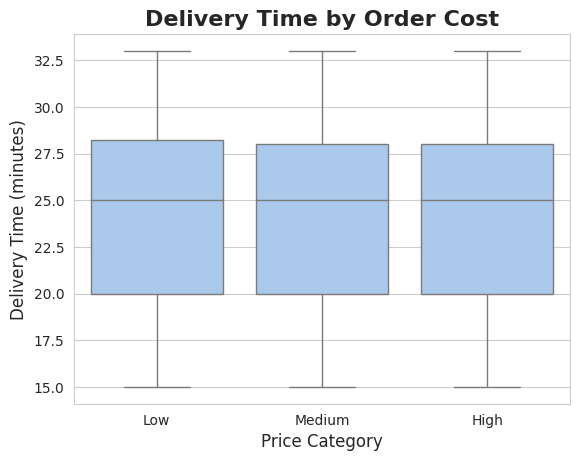

In [ ]:
# Create a boxplot for delivery time according to price of order
# The x-axis represents the high, medium and low price category ('price_category')
# The y-axis represents the delivery times ('delivery_time')
sns.boxplot(x='price_category', y='delivery_time', data=df1)

# Add a descriptive title to the plot
plt.title("Delivery Time by Order Cost", fontsize=16, fontweight='bold')  # Title of the plot

# Label the x-axis to indicate it represents the spending categories
plt.xlabel("Price Category", fontsize=12)  # Label for the x-axis

# Label the y-axis to indicate it represents the delivery times in minutes
plt.ylabel("Delivery Time (minutes)", fontsize=12)  # Label for the y-axis

# Display the plot
plt.show()

There is no difference in delivery times across spending categories, indicating that higher-priced orders are prepared in the similar timeframe as other orders. However, this does not show us the number of food items per order. It is possible that one order contains a large number of low- or medium-priced food items, while another contains a small number of high-priced items, which in comparison take longer to prepare than the large number of items from a low- to medium-priced restaurant. While we do not have the information on the number of items per order in the dataset, we can check the number of orders in price ranges per cuisine type and per restaurant.




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Count the number of orders for each customer
top_3_customers = df1['customer_id'].value_counts().head(3)

# Display the top 3 most frequent customers and their order counts
print("Top 3 Most Frequent Customers:")
print(top_3_customers)

Top 3 Most Frequent Customers:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: The top 3 most frequent customers have made 13, 10 and 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


Cuisine vs Cost of the order

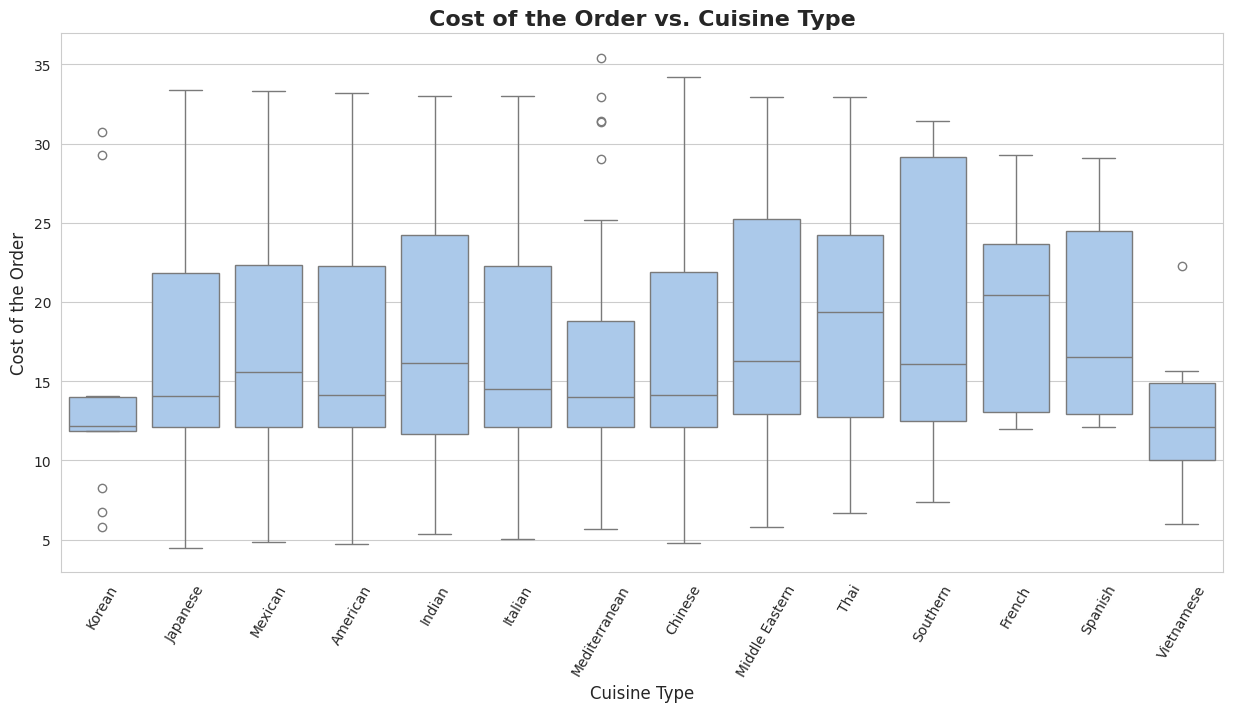

In [ ]:
# Create a boxplot for cuisine type and cost of the order, visually appealing
# Set the figure size for the plot
plt.figure(figsize=(15, 7))  # Width of 15 units and height of 7 units

# The x-axis represents different cuisine types ('cuisine_type')
# The y-axis represents the cost of the order ('cost_of_the_order')
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df1)

# Rotate the x-axis labels by 60 degrees for better readability
plt.xticks(rotation=60)

# Add a title
plt.title("Cost of the Order vs. Cuisine Type", fontsize=16, fontweight='bold')

# Label the x-axis to indicate it represents the cuisine types
plt.xlabel("Cuisine Type", fontsize=12)

# Label the y-axis to indicate it represents the cost of the order
plt.ylabel("Cost of the Order", fontsize=12)

# Display the plot
plt.show()

According to the boxplot, the highest cost of orders is for Southern cuisine, almost up to 30 USD, with the median at 15 USD. Southern cuisine might contain higher-cost items or it might be popular for group orders, which would increase the order price. There are only 17 observations for this cuisine in the dataset, so we would need more observations for more reliable conclusions. Middle Eastern, Indian, and Spanish cuisine also show a relatively high price potential, up to 23 to 25 USD. A caveat is that we only have 73 observations for Indian, 49 for Middle Eastern, and as few as 12 for Spanish cuisine. It is interesting to note extreme outliers toward the high price range in Mediterranean, Korean and Vietnamese cuisine. While there are only 46 observations in Mediterranean cuisine, there is a significant number of outliers with high prices, indicating that there are premium items in this type of cuisine favored by customers. Similar might be true for Korean and Vietnamese cuisine, but we would need more observations in the dataset. When looking at those cuisine types with a reliable nb of observations, we can see that American and Mexican cuisine contain orders that go up to 23 USD in cost, while Japanese and Italian go up to 22 USD. This can indicate premium items, but very likely it indicates higher prices for larger orders with many food items.

Cuisine vs Food Preparation time

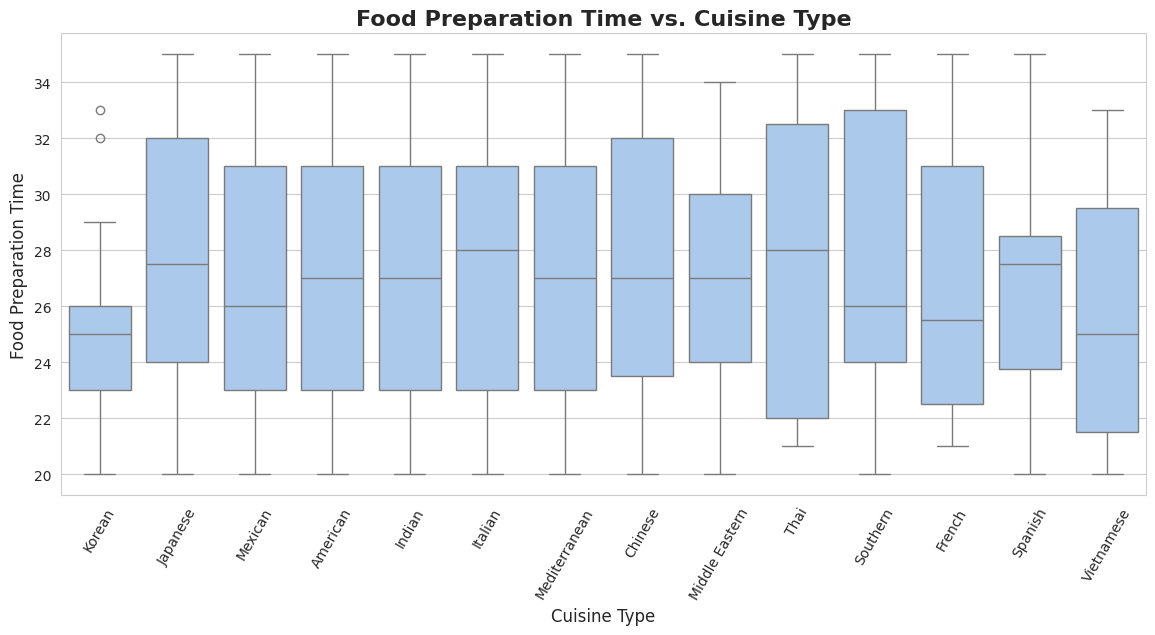

In [ ]:
# Visualize cuisine type vs. food preparation time

# Ensure the plot is large enough for readability (there are 14 cuisine types)
plt.figure(figsize=(14,6))

# Create a boxplot for cuisine type vs. food preparation time
# The x-axis represents different cuisine types ('cuisine_type')
# The y-axis represents the food preparation time ('food_preparation_time')
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df1)

# Rotate the x-axis labels by 60 degrees
plt.xticks(rotation=60)

# Add a title
plt.title("Food Preparation Time vs. Cuisine Type", fontsize=16, fontweight='bold')

# Label the x-axis
plt.xlabel("Cuisine Type", fontsize=12)

# Label the y-axis
plt.ylabel("Food Preparation Time", fontsize=12)

# Display the plot
plt.show()


The shortest food preparation times are noted for Thai and Vietnamese cuisine, but they also have a very large range, and there is a small number of observations for these cuisines in the dataset, which makes the conclusions unreliable. The longest preparation times are indicated for Southern, Thai, Japanese and Chinese cuisines. These cuisines have food items that take longer to prepare than other cuisines on average. Thai cuisine has the widest range of preparation time, but there is not enough data for this type of cuisine in the dataset. A significant number of cuisine types are in the same range for preparation time: Mexican, American, Indian, Italian, Mediterranean and French are in the range between 23 and 31 minutes of preparation time, with the median for Mexican and French being lower than the rest, and the median for Italian being higher than the rest.

Rating vs. Cost of the Order

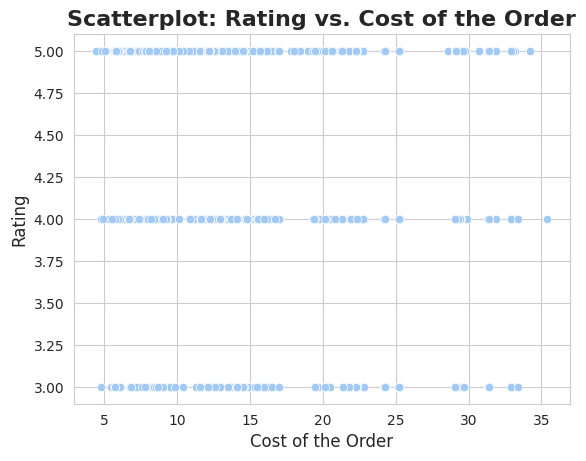

In [ ]:
# Create a scatterplot for cost of the order vs. rating

# Generate the scatterplot
# The x-axis represents the cost of the order
# The y-axis represents the rating
sns.scatterplot(data=df1, x='cost_of_the_order', y='rating')

# Title
plt.title('Scatterplot: Rating vs. Cost of the Order', fontsize=16, fontweight='bold')

# X-axis
plt.xlabel('Cost of the Order', fontsize=12)

# y-axis
plt.ylabel('Rating', fontsize=12)

# Display the plot
plt.show()

In [ ]:
# Check average order cost for each rating
# For each rating, calculate the mean of the 'cost_of_the_order' column
rating_cost_summary = df1.groupby('rating')['cost_of_the_order'].mean()

# Print the summary
print(rating_cost_summary)

rating
3.0    16.223351
4.0    16.710337
5.0    16.476314
Name: cost_of_the_order, dtype: float64


The scatterplot and statistical analysis show that there is a similar occurence of ratings of 3, 4 and 5 in each price range. Orders rated 3 are in the price range of 16.22. Similarly, orders rated 5 cost 16.47 on average, and those rated 4 cost 16.71 on average. This indicates that the cost does not have a strong influence on the rating, i.e. is not in a strong correlation with the rating, especially in the case of ratings of 3 and 5. The highest average cost is linked to the rating of 4, which indicates that there might be a mix of ratings.

Rating vs. Type of Cuisine

In [ ]:
# # Calculate the mean of the 'rating' column for each cuisine type
cuisine_rating_summary = df1.groupby('cuisine_type')['rating'].mean()

print("Average rating by cuisine type:")
print(cuisine_rating_summary)

Average rating by cuisine type:
cuisine_type
American          4.558219
Chinese           4.590698
French            4.611111
Indian            4.684932
Italian           4.630872
Japanese          4.636170
Korean            4.384615
Mediterranean     4.456522
Mexican           4.636364
Middle Eastern    4.469388
Southern          4.470588
Spanish           4.916667
Thai              4.842105
Vietnamese        4.285714
Name: rating, dtype: float64


In [ ]:
#Reminder of the number of orders per cuisine type
cuisine_counts = df1['cuisine_type'].value_counts()
print(cuisine_counts)

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64


Before preparing the boxplot, I wanted to remind myself of the number of ratings for each cuisine type. For each cuisine type with a number of ratings under 100, the conclusions drawn will not be very statistically reliable. We can see that only American, Japanese, Italian and Chinese cuisine types were rated more than 100 times and that conclusions can be drawn for them in terms of statistical representation for ratings.

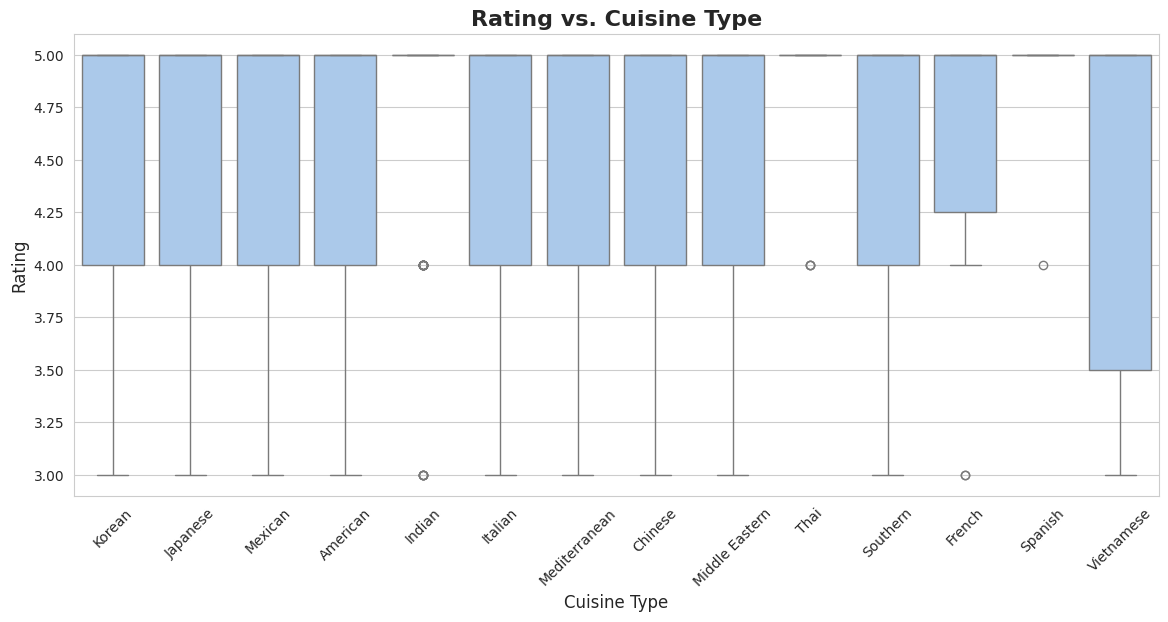

In [ ]:
#  Create a boxplot for ratings across different cuisine types

# Set the figure size for better readability, there are 14 cuisine types
plt.figure(figsize=(14, 6))

# The x-axis represents different cuisine types ('cuisine_type')
# The y-axis represents the ratings ('rating')
sns.boxplot(data=df1, x='cuisine_type', y='rating')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45, fontsize=10)
# Title
plt.title('Rating vs. Cuisine Type', fontsize=16, fontweight='bold')
# X-axis
plt.xlabel('Cuisine Type', fontsize=12)
# y-axis
plt.ylabel('Rating', fontsize=12)

# Display the plot
plt.show()

Statistical analysis and the boxplot show that there is a large variability in ratings in correlation with the type of cuisine: the highest rated cuisine is Spanish, followed by Thai, but the numbers of rated orders are too small. High ratings are also noted for Indian, followed by Mexican, Japanese and Italian. In this case, we cannot draw reliable conclusions about the ratings of Indian or Mexican cuisine type orders, but only about Japanese and Italian. Indian cuisine also shows extreme outliers, indicating variability in the ratings. Extreme outliers are also noted for Middle Eastern, French, and Spanish cuisine. Vietnamese cuisine received the lowest ratings, but there are only 7 observed cases in the dataset for this cuisine, so the conclusion can not be reliable. The most frequently ordered cuisine types (American, Japanese, Italian, and Chinese) are rated between 4.5 and 4.6.

Food Preparation Time vs. Day of the Week

In [ ]:
#Group the data according to food preparation time and day of the week
avg_food_preparation_time_by_day_of_the_week = df1.groupby('day_of_the_week')['food_preparation_time'].mean()
print(avg_food_preparation_time_by_day_of_the_week)

day_of_the_week
Weekday    27.212066
Weekend    27.436714
Name: food_preparation_time, dtype: float64


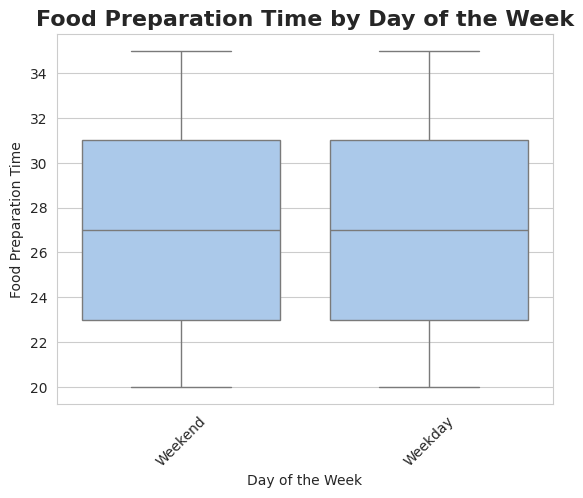

In [ ]:
#Visualize the data with a boxplot
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df1)
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time')
plt.title('Food Preparation Time by Day of the Week', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

Food preparation times are very similar when comparing them on the weekend and weekdays.

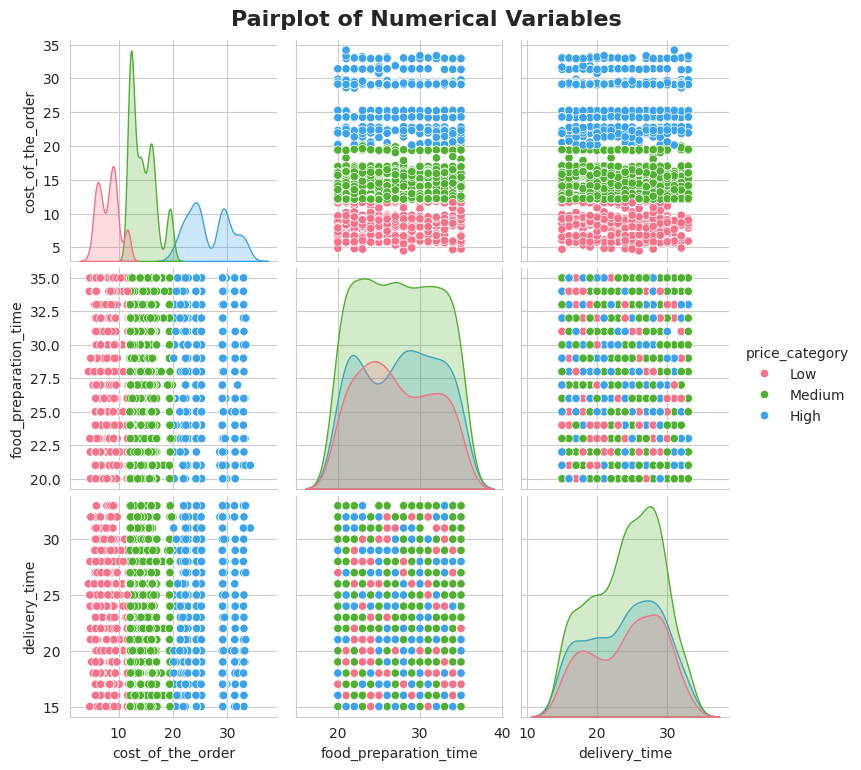

In [ ]:
# Pairplot to explore relationships between numerical variables, visually appealing
sns.pairplot(data=df1, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], hue='price_category', palette="husl")
plt.suptitle("Pairplot of Numerical Variables", y=1.02, fontsize=16, fontweight='bold')
plt.show()

Pairplot shows right-skewness of cost of the order, indicating that higher costs are not frequent. Delivery time is left-skewed, indicating higher values, which is expected. Food preparation time has a relatively symmetrical distribution. Food preparation time shows that there are clusters of timings in the range between 20 and 35 minutes. Delivery times are typically 25 to 29 minutes, ranging between 15 and 32 minutes. Scatterplots indicate that there is no significant correlation between variables, which is confirmed by the heatmap below.

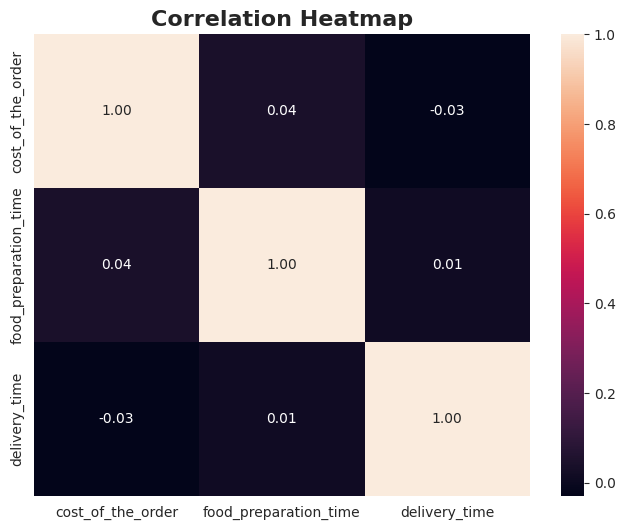

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr()
sns.heatmap(correlation_matrix, annot=True,  fmt='.2f')
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.show()

In the above heatmap we can see that there is no scatterplot indicating a strong correlation between any two categories. The diagonal whitish squares represent correlations of individual variables with themselves.
All correlation values in black squares are close to zero, which indicates an absence of correlations, i.e. each variable is independent of others.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Use the original dataset (df2) and replace string values of 'Not given' in the 'rating' column with NaN (missing values)
df2['rating'] = df2['rating'].replace('Not given', np.nan)


In [ ]:
# Convert to floats
df2['rating'] = df2['rating'].astype(float)


In [ ]:
print(df2['rating'])

0       NaN
1       NaN
2       5.0
3       3.0
4       4.0
       ... 
1893    5.0
1894    5.0
1895    NaN
1896    5.0
1897    NaN
Name: rating, Length: 1898, dtype: float64


In [ ]:
rating_summary = df2.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

In [ ]:
eligible_restaurants = rating_summary[(rating_summary['count'] > 50) & (rating_summary['mean'] > 4)]
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)

Restaurants eligible for the promotional offer:
               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


I used my unchanged dataset (df2) to answer this question. In the df2 dataset I kept the string values 'Not given' in the rating column. I replaced them with np.nan, and then converted them to floats. In this way I could calculate the real number of restaurants that received more than 50 ratings. The df.groupby function grouped the data by restaurant name. With .agg(['count','mean]) it counted the number of non-NaN values in the rating column for each restaurant, and 'mean' calculated the average values for each restaurant. We can see that there are only four restaurants that received more than 50 ratings and got the average ratings greater than 4.

In [ ]:
#For the purpose of comparison, check the same in the adjusted dataset (df1)
rating_summary = df1.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()
eligible_restaurants = rating_summary[(rating_summary['count'] > 50) & (rating_summary['mean'] > 4)]
print("Restaurants eligible for the promotional offer:")
print(eligible_restaurants)


Restaurants eligible for the promotional offer:
               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     96  4.552083
21           Blue Ribbon Sushi    119  4.521008
109                       Parm     68  4.500000
121           RedFarm Broadway     59  4.474576
122             RedFarm Hudson     55  4.490909
136                Shake Shack    219  4.561644
153          The Meatball Shop    132  4.689394


#### Observations:I used this line of code to check my df1, which is the changed dataset, in which the NaN values in rating were replaced with the median. As the median value is 5.0, the consequence is that I got an inflated result, which does not correspond to reality. If I used this dataset, I would conclude that 7 restaurants are eligible for the promotional offer, but this would be a wrong conclusion.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def calculate_commission(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0



In [ ]:
#Calculate overall commission from all orders
#Create a separate column called 'commission'
df1['commission'] = df1['cost_of_the_order'].apply(calculate_commission)

In [ ]:
#Calculate the total commission
net_revenue = df1['commission'].sum()

print(f"The net revenue generated by the company is: ${net_revenue:.2f}")

The net revenue generated by the company is: $6166.30



#### Observations: The company's net revenue across all orders is 6166.30 USD.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
#Calculate total time and create a new column named 'total time'
df1['total_time'] = df1['food_preparation_time'] + df1['delivery_time']

In [ ]:
#Find out the number of orders taking longer than 60 minutes
#Filter the dataset, use shape function to count only those orders
orders_over_60 = df1[df1['total_time'] > 60].shape[0]

In [ ]:
total_orders = df1.shape[0]

In [ ]:
percentage_over_60 = (orders_over_60 / total_orders) * 100
print(f"Percentage of orders taking more than 60 minutes: {percentage_over_60:.2f}%")

Percentage of orders taking more than 60 minutes: 10.54%


#### Observations: First, I calculated the total time of orders. Then, I counted the orders taking more than 60 minutes to prepare and deliver. Next, I counted the percentage of orders that took longer than 60 minutes to prepare and deliver. An overall of 10.54% of orders take more than 60 minutes to deliver from the time of placing the order.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
avg_delivery_time_by_day = df1.groupby('day_of_the_week')['delivery_time'].mean()
print(avg_delivery_time_by_day)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


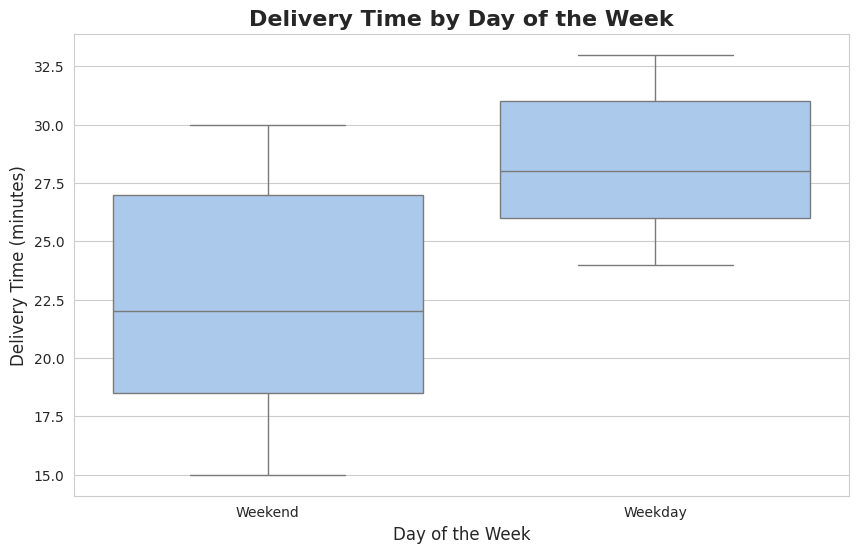

In [ ]:
#Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for delivery times across days of the week
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df1)

# Title
plt.title('Delivery Time by Day of the Week', fontsize=16, fontweight='bold')

# x-axis
plt.xlabel('Day of the Week', fontsize=12)

# y-axis
plt.ylabel('Delivery Time (minutes)', fontsize=12)

# Display the plot
plt.show()

#### Observations:  The boxplot for delivery time vs. day of the week shows that the delivery takes longer during weekdays than on the weekend. On weekends, orders are delivered on average in 22.5 minutes, with a range between 19 and 27 minutes. On weekdays, orders are delivered in 27.5 minutes on average, ranging between 26 and 31 minutes. This is a significant difference. It is interesting to observe that delivery times are shorter on weekends, even though that is also the peak time for orders and most orders are delivered on weekends.It is possible that on weekends there are more delivery persons, or delivery persons take a larger number or orders at once, because orders happen more frequently. This can result in a quicker delivery of a large number of orders. On weekdays, orders might be less frequent, resulting in the need to make more trips with a smaller number of orders. This then results in longer delivery times in comparison to weekend delivery times.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

Data analysis has shown the following:
The dataset consists of 1898 rows and 9 columns: order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, and delivery_time.
The dataset contains integers, floats, and objects as data types.
Exploratory data analysis showed that the dataset consists of 1200 unique customers who placed an overall of 1898 orders from 178 restaurants. 14 cuisine types are represented in the dataset. Manual inspection of the dataset showed that only four types of cuisines are represented with a reliable number of observations: American, Japanese, Italian, and Chinese.
Types of Cuisine
Top 5 restaurants according to the number of orders represent American, Japanese, and Italian cuisine. Shake Shack is the restaurant with the largest number of orders (219) in the dataset, alomost double in comparison to the second restaurant, The Meatball Shop (132). Blue Ribbon Sushi has a slightly smaller number of orders (119) than The Meatball Shop. In fourth place is Blue Ribbon Fried Chicken (96), and in fifth is Parm (68), which is far removed from the first four restaurants in the number of orders.

Pricing
According to the statistical summary of the dataset, an average cost of an order is 16.49 USD, with the range from 4.47 to 35.41 USD. Almost 30% of orders are in the higher cost range above 20 USD, indicating a significant portion of customers who are willing to spend  more than average.

Rating
The ratings are in the range from 3 to 5, with the average value being 4.59. There are almost 30% of orders priced above 20 USD, showing that there is a significant number of customers who are willing to spend more money than average.
There were no missing values, but there were string values of ‘Not given’ for 736 unrated orders out of 1898 orders, accounting for 38.76% of unrated orders. Two datasets were kept, namely df1 and df2. In df1, the rating column was adjusted by changing the string values to NaN and replacing them with the median value, which was 5.0 for that column. In the df2, this was not done. Df2 was used later to calculate restaurant eligibility for promotional offers.  
Most orders are rated with 5 after replacing almost 40% of unrated orders. The highest mean ratings are for Spanish (4.91) and Thai cuisine (4.84). However, those cuisines have a low number of observations. Cuisines with the number of observations above 100 are American, Japanese, Italian, and Chinese. Among those, the highest rated are Japanese and Italian (4.6), followed by Chinese (4.59) and American (4.55). The lowest ratings are given to Korean and Vietnamese cuisines, but they do not have a high enough count of occurences for a statistically reliable result.
Food Preparation Time and Delivery Time
Food preparation times are very similar when comparing them on the weekend and weekdays. Food preparation time is typically 20 minutes, with most orders being prepared between in 27 minutes on average. Delivery time is between 20 and 28 minutes, with more than 50% of orders being delivered in 25 minutes. Multivariate analysis shows that delivery times are shorter on weekends than on weekdays.
Delivery times vs. Days of the Week
Average delivery times on weekdays are 28 minutes, and only 22.47 minutes on weekends. Delivery times are shorter on weekends, which indicates that possibly there are more delivery persons available or delivery persons take a larger number of orders to complete in one trip on weekends.

There is no difference in delivery times across spending categories, indicating that higher-priced orders are prepared in the similar timeframe as other orders. However, this does not show us the number of food items per order. It is possible that one order contains a large number of low- or medium-priced food items, while another contains a small number of high-priced items, which in comparison take longer to prepare than the large number of items from a low- to medium-priced restaurant.
The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Those are customers with id 52832   (13 orders), 47440 (10 orders), and 83287     (9 orders).

Days of the Week
Most orders are placed on the weekend, with 1351 out of a total of 1898. On the weekends clients typically order American cuisine.
Cuisine Type and Cost of Order
Multivariate analysis of cuisine type vs. order cost showd that the highest cost of orders is for Southern cuisine, almost up to 30 USD, with the median at 15 USD. There are only 17 observations for this cuisine in the dataset, so we would need more observations for more reliable conclusions. Middle Eastern, Indian, and Spanish cuisine also show a relatively high price potential, up to 23 to 25 USD. A caveat is that we only have 73 observations for Indian, 49 for Middle Eastern, and as few as 12 for Spanish cuisine. It is interesting to note extreme outliers toward the high price range in Mediterranean, Korean and Vietnamese cuisine. While there are only 46 observations in Mediterranean cuisine, there is a significant number of outliers with high prices, indicating that there are premium items in this type of cuisine favored by customers. Similar might be true for Korean and Vietnamese cuisine, but we would need more observations in the dataset. When looking at those cuisine types with a reliable number of observations, we can see that American and Mexican cuisine contain orders that go up to 23 USD in cost, while Japanese and Italian go up to 22 USD. This can indicate premium items, but very likely it indicates higher prices for larger orders with many food items.

Cuisine Type and Preparation Time
The shortest food preparation times are noted for Thai and Vietnamese cuisine, but they also have a very large range, and there is a small number of observations for these cuisines in the dataset, which makes the conclusions unreliable. The longest preparation times are indicated for Southern, Thai, Japanese and Chinese cuisines. These cuisines have food items that take longer to prepare than other cuisines on average. Thai cuisine has the widest range of preparation time, but there is not enough data for this type of cuisine in the dataset. A significant number of cuisine types are in the same range for preparation time: Mexican, American, Indian, Italian, Mediterranean and French are in the range between 23 and 31 minutes of preparation time, with the median for Mexican and French being lower than the rest, and the median for Italian being higher than the rest.

Rating vs. Cost of the Order
The scatterplot and statistical analysis show that there is a similar occurence of ratings of 3, 4 and 5 in each price range. Orders rated 3 are in the price range of 16.22. Similarly, orders rated 5 cost 16.47 on average, and those rated 4 cost 16.71 on average. This indicates that the cost does not have a strong influence on the rating.

Rating vs. Type of Cuisine
The most frequently ordered cuisine types (American, Japanese, Italian, and Chinese) are rated between 4.5 and 4.6.
There is a large variability in ratings in correlation with the type of cuisine: the highest rated cuisine is Spanish, followed by Thai, but the numbers of rated orders are too small. High ratings are also noted for Indian, followed by Mexican, Japanese and Italian. In this case, we cannot draw reliable conclusions about the ratings of Indian or Mexican cuisine type orders, but only about Japanese and Italian. Indian cuisine also shows extreme outliers, indicating variability in the ratings. Extreme outliers are also noted for Middle Eastern, French, and Spanish cuisine. Vietnamese cuisine received the lowest ratings, but there are only 7 observed cases in the dataset for this cuisine, so the conclusion can not be reliable.

Cost of the Order vs. Preparation Time vs. Delivery Time
Cost of the order seems to be independent of preparation time and delivery time. All three variables seem independent from each other.
There are 4 restaurants eligible for the promotional offer. They have a rating count of more than 50 and average ratings above 4. Those are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.
The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Net revenue generated by the company across all orders amounts to $ 6166.30.
The total time required to deliver the food.
Percentage of orders taking more than 60 minutes is 10.54%. Most orders (49%) are fulfilled in the timeframe just under 1 hour (50 to 59.99 minutes).






### Recommendations:

* Recommendations

1.	Customers

a.	High-spending customers

The company earns a higher revenue on orders above 20 USD, as it charges restaurants 25% on more expensive orders (above 20 USD). There is a significant customer share willing to spend more than 20 USD per order. There are almost 30% of orders above 20 USD. This shows that there are customers who might prefer premium items on the menu or combined dishes, or extras. Also, they might order from less frequently represented restaurants, which have higher costs. On the other hand, orders above 20 USD might indicate group orders for a larger number of people, especially considering weekend gathering and parties.

Recommendations:

•	Incentivize higher-price orders by offering loyalty points to customers. These points should be offered to repeat clients who order in the higher price range, i.e. above 20 USD.
•	Introduce or add more premium meal bundles and exclusive offers in the desired price range above 20 USD.  
•	Provide more data. When more data is available for each cuisine type (i.e. at least 100 orders per cuisine type), it will be possible to ascertain which premium food items are in demand among such clientele.
•	Continue existing and introduce new promotional offers for higher-cost orders. Provide more reliable data for underrepresented cuisines (under 100 orders).

b.	Personalized Loyalty Programs for Frequent Customers

Top customers are those who keep returning and making many orders.

Recommendation: For such customers special loyalty programs can be developed, as well as exclusive offers and deals.

c.	Customer Segmentation for Marketing Purposes

Insights from the data show that customers prefer American, Japanese and Italian cuisine, and usually order on weekends.

Recommendation:
•	Customers can be segmented according to spending habits, cuisine types and order frequency. Then, targeted promotion activities can be applied, specifically on weekends and for the favored cuisines that bring high revenue.

2.	Cuisine and Items on Offer

a.	Enhance Premium Item Marketing

According to the data analysis, there is a significant number of high-cost offers (ca. 30%). These might be from group orders or from premium item orders.

Recommendation:
•	Customers with previous high-cost orders should be targeted with premium item promotion.
•	Improve visuals for premium items and group orders.

b.	Learn from Top Restaurants

Top restaurants offer American cuisine, along with Japanese and Italian. The top 5 restaurants are among the most popular, with the largest number of orders. Their offer can be strengthened.

Recommendation:
•	Partnering with top restaurants for exclusive deals and promotions.
•	Checking the customer behavior for top restaurants to improve the results with other restaurants.

c. Improve  popularity of less well-represented restaurants

•	Get them to select their best offer and promote it as chef’s specialty or special offers
•	Increase their rated count and rating values by incentivizing ratings through discounts or offering loyalty points

3.	Service

a.	Improve Delivery Time on Weekdays

Delivery times are shorter on weekends, when there is also the highest number of orders. More data is needed to ascertain the reasons for this. Possibly there are more delivery persons available on weekends, or more orders are fulfilled in single trips due to high frequency of orders in given timeframes. Information on this will enable conclusions on what is needed to improve.

Recommendation:
•	Possibly more delivery persons are needed during weekdays or peak timings.
•	Optimize delivery routes.

b.	Time-Intensive Orders

The dataset does not provide enough data to ascertain which orders take more time to prepare. A small percentage, 10%, takes longer than 60 minutes from order placement to delivery.

Recommendation:
•	If preparation times for group orders are longer, recommendation is for specific promotions of group orders or prioritization of specific orders with higher costs.
•	High-cost orders of premium items should be promoted among potential customers for such orders.

c.	Improve Restaurants with Slower Service
•	Take insights from top performing restaurants and work with restaurants that need assistance with streamlining.

4.	Marketing, Ratings and Trust

a.	Marketing

There is a significant variation of prices and ratings in the dataset. There is a high number of unrated orders.
Recommendation:
•	Market cuisine types with higher ratings to increase trust among customers.

b.	Targeted Campaigns and Increased Ratings

The data shows that almost 40% of orders are unrated. This makes it difficult to ascertain customer satisfaction.

Recommendation:
•	Incentivize order ratings, possibly by offering discounts for subsequent orders. Check if the rating process is simple and straightforward enough, and improve it if needed.
•	Identify time-sensitive customers and target them with quick offers and cuisines

5.	Revenue Model

The revenue was generated by charging 25% on high-cost orders (above 20 USD) and 15% on orders above 5 USD. This model can be further adjusted after customer segmentation and order types.
•	Recommendation:
Commissions for premium item orders and group orders can be higher.



---